In [146]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

# Question 1
class Node:
    def __init__(self, data):
        self.threshold = [];
        self.data = data;
        self.left_child = [];
        self.right_child = [];
        self.entropy = [];
        self.ind = [];
        self.label = [];
        self.find_best_split();

    def set_children(self,left, right):
        self.left_child = left;
        self.right_child = right;

    def find_best_split(self):
        array = self.data;
        s = array.shape;
        C, Inds = DetermineCandidateSplits(array);
        if len(C[0])==len(C[1])&len(C[1])==0:
            self.entropy = 0;
            self.label = array[0,2];
        else:
            E = [];
            ind = [];
            max_value = [];
            for i in range(0,s[1]-2):
                E.append([]);
                array = array[array[:,i].argsort()];
                if (len(Inds[i]))>0:
                    for j in range(0,len(Inds[i])-1):
                        p = sum(array[0:Inds[i][j],2])/(Inds[i][j]+1);
                        #p = sum(array[0:Inds[i][j],2])/(len(array));
                        #p2 = sum(array[Inds[i][j]:s[0],2])/(s[0]-Inds[i][j])
                        if p>0:
                            v =(p*math.log2(p))+((1-p)*math.log2(1-p));
                            #v2 = (p2*math.log2(p2))+((1-p2)*math.log2(1-p2));
                            #v = (((Inds[i][j]+1)*v)+((s[0]-Inds[i][j])*v2))/s[0];
                        else:
                            v = 0;
                        E[i].append(-v);
                else:
                    p = 1;#sum(array[0:Inds[i][0],2])/len(array);
                    v = 0;
                    E[i].append(-v);
                if len(E[i])>0:
                    max_value.append(max(E[i]));
                    ind.append(E[i].index(max_value[i]));
                else:
                    max_value.append(0);
                    ind.append(0);
            self.entropy = max(max_value);
            ind_value = max_value.index(self.entropy);
            if self.entropy!=0:
                self.threshold = C[ind_value][ind[ind_value]];
                split_ind = Inds[ind_value][ind[ind_value]];
                array = array[array[:,ind_value].argsort()];
                self.ind = ind_value;
                left = Node(array[0:split_ind]);
                right = Node(array[split_ind+1:s[0]]);
                self.set_children( left, right );
            else:
                self.label = array[0,2];
            
        

In [199]:
def DetermineCandidateSplits(array):
    s = array.shape;
    C = [];
    Ind = [];
    count = 0; 
    for i in range(0,s[1]-1):
        C.append([]);
        Ind.append([]);
        arraysort = array[array[:,i].argsort()];
        for j in range(0,s[0]-2):
            if arraysort[j,2]!=arraysort[j+1,2]:
                C[i].append((arraysort[j,i]+arraysort[j+1,i])/2);
                Ind[i].append(j);

    return C, np.array(Ind);


def DecisionTree(array):
    # Train Decision Tree
    tree = Node(array);
    return tree;

def EvaluateTree(test,tree):
    label = [];
    o_tree = tree;
    for i in range(0,len(test)):
        entropy = 1;
        tree = o_tree;
        while entropy>0:
            if tree.left_child != []:
                if test[i][tree.ind]>tree.threshold:
                    tree = tree.left_child;
                else:
                    tree = tree.right_child;
                l = tree.label;
                entropy = tree.entropy;
            else:
                entropy =0;
                l = tree.label;
        label.append(l);
    return label;


In [148]:
fname = 'data/D1.txt';
array = [];
with open(fname) as f:
    array.append([float(x) for x in next(f).split()]) # read first line
    for line in f: # read rest of lines
        array.append([float(x) for x in line.split()]);
array = np.array(array);

tree = DecisionTree(array[0:899]);  

label = EvaluateTree(array[900:1000],tree)
print(sum(abs(label-array[900:1000,2]))/(1000-900))


0.35


/var/folders/_f/jxd8d57d641gld_fttthhb4m0000gn/T/ipykernel_23681/1832735791.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return C, np.array(Ind);


In [116]:
# Question 2.3

fname = 'data/Druns.txt';
array = [];
with open(fname) as f:
    array.append([float(x) for x in next(f).split()]) # read first line
    for line in f: # read rest of lines
        array.append([float(x) for x in line.split()]);
array = np.array(array);

C, ind = DetermineCandidateSplits(array);  
array = array[array[:,0].argsort()]
print(C)
print(ind)
print(array)

[[0.0, 0.0, 0.0, 0.0], [-1.5, -0.5, 5.5, 6.5]]
[[0 6 7 8]
 [0 1 7 8]]
[[ 0.  -1.   1. ]
 [ 0.   0.   0. ]
 [ 0.   1.   0. ]
 [ 0.   2.   0. ]
 [ 0.   3.   0. ]
 [ 0.   4.   0. ]
 [ 0.   5.   0. ]
 [ 0.   6.   1. ]
 [ 0.   7.   0. ]
 [ 0.   8.   1. ]
 [ 0.1 -2.   0. ]]


In [121]:
# Question 2.4

fname = 'data/D3leaves.txt';
array = [];
with open(fname) as f:
    array.append([float(x) for x in next(f).split()]) # read first line
    for line in f: # read rest of lines
        array.append([float(x) for x in line.split()]);
array = np.array(array);

tree = DecisionTree(array); 
print(array)


[[10.  1.  1.]
 [10.  2.  1.]
 [10.  3.  1.]
 [ 1.  1.  0.]
 [ 1.  3.  1.]]


/var/folders/_f/jxd8d57d641gld_fttthhb4m0000gn/T/ipykernel_23681/1832735791.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return C, np.array(Ind);


In [163]:
# Question 2.5

fname = 'data/D2.txt';
array = [];
with open(fname) as f:
    array.append([float(x) for x in next(f).split()]) # read first line
    for line in f: # read rest of lines
        array.append([float(x) for x in line.split()]);
array = np.array(array);

tree = DecisionTree(array); 
C, ind = DetermineCandidateSplits(array)
print(tree.threshold)
print(tree.ind)
print(tree.left_child.threshold)
print(tree.left_child.ind)
print(tree.left_child.left_child.threshold)
print(tree.left_child.left_child.ind)
print(tree.left_child.left_child.left_child.threshold)
print(tree.left_child.left_child.left_child.ind)
print(tree.left_child.left_child.left_child.left_child.threshold)
print(tree.left_child.left_child.left_child.left_child.ind)
print(tree.left_child.left_child.left_child.left_child.left_child.threshold)
print(tree.left_child.left_child.left_child.left_child.left_child.ind)


/var/folders/_f/jxd8d57d641gld_fttthhb4m0000gn/T/ipykernel_23681/1832735791.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return C, np.array(Ind);


0.982573
0
0.9488475000000001
0
0.9405675
0
0.9265535
0
0.9219925
0
0.9038010000000001
0


1000


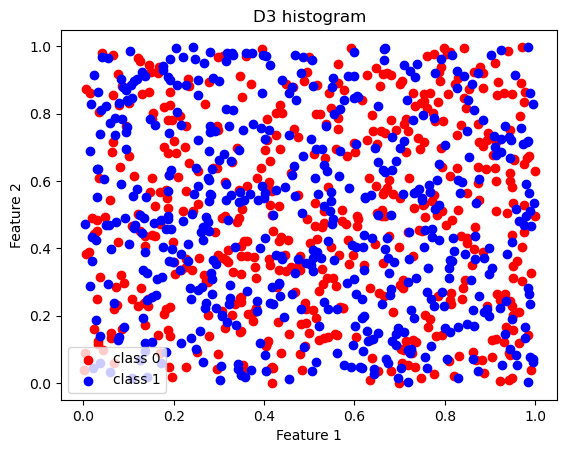

In [187]:
# Question 2.6
fname = 'data/D1.txt';
array = [];
with open(fname) as f:
    array.append([float(x) for x in next(f).split()]) # read first line
    for line in f: # read rest of lines
        array.append([float(x) for x in line.split()]);
array = np.array(array);
array = array[array[:,2].argsort()]
X = array[:,0];
Y = array[:,1];

fname = 'data/D2.txt';
array2 = [];
with open(fname) as f:
    array2.append([float(x) for x in next(f).split()]) # read first line
    for line in f: # read rest of lines
        array2.append([float(x) for x in line.split()]);
array2 = np.array(array2);
#plt.scatter(X[825:1000],Y[825:1000],color = 'r',label = 'class 0');
#plt.scatter(X[0:824],Y[0:824],color ='b',label = 'class 1');
#plt.plot(X,0.2*np.ones(1000),color = 'g',label = 'decision bound')
#plt.xlabel('Feature 1')
#plt.ylabel('Feature 2')
#plt.title('D1 histogram')
#plt.legend()

X = array2[:,0];
Y = array2[:,1];
array2 = array2[array2[:,2].argsort()]
print(len(X))
plt.scatter(X[493:1000],Y[493:1000],color = 'r',label = 'class 0');
plt.scatter(X[0:492],Y[0:492],color ='b',label = 'class 1');
#plt.plot(X,0.2*np.ones(1000),color = 'g',label = 'decision bound')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('D3 histogram')
plt.legend()

In [206]:
# Question 2.7
fname = 'data/Dbig.txt';
array = [];
with open(fname) as f:
    array.append([float(x) for x in next(f).split()]) # read first line
    for line in f: # read rest of lines
        array.append([float(x) for x in line.split()]);
array = np.array(array);
array = array[array[:,2].argsort()]

err = [];
l = np.array([32,128,512,2048,8192])
for i in range(0,5):
    tree = DecisionTree(array[0:l[i]]);  

    label = EvaluateTree(array[l[4]+1:10000],tree)
    err.append(sum(abs(label-array[l[4]+1:10000,2]))/(10000-l[4]))



#plt.scatter(l,err,color ='b');
#plt.xlabel('Training Data Size')
#plt.ylabel('Error')
#plt.title('Error vs complexity')
#plt.legend()

print(tree.threshold)

/var/folders/_f/jxd8d57d641gld_fttthhb4m0000gn/T/ipykernel_23681/1716542492.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return C, np.array(Ind);


0.0273725


0
-0.8754875
0
1.135724
0
0.0


ValueError: x and y must be the same size

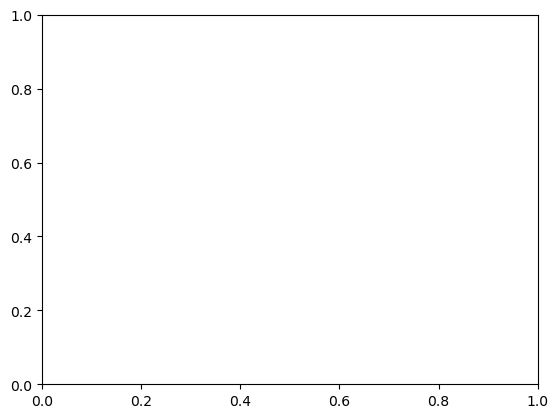

In [215]:
print(tree.ind)
print(tree.left_child.threshold)
print(tree.left_child.ind)
print(tree.right_child.threshold)
print(tree.right_child.ind)
print(tree.left_child.right_child.label)

X = array[:,0];
Y = array[:,1];

plt.scatter(X[0:8192],Y[493:1000],color = 'r',label = 'class 0');
plt.scatter(X[0:492],Y[0:492],color ='b',label = 'class 1');
#plt.plot(X,0.2*np.ones(1000),color = 'g',label = 'decision bound')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('D3 histogram')
plt.legend()

[1, 1, 1, 67, 233]
[0.07807308970099668, 0.07807308970099668, 0.07807308970099668, 0.3272425249169435, 0.3183831672203765]


Text(0.5, 1.0, 'Error vs complexity')

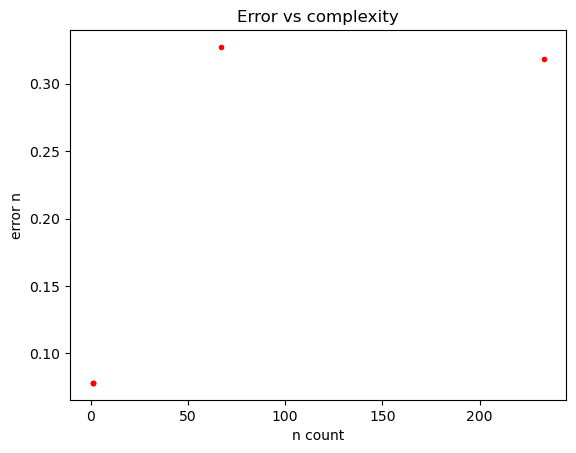

In [799]:
# Question 3

from sklearn import tree
fname = 'data/DBig.txt'
array = [];
err = [];
ncount = [];
with open(fname) as f:
    array.append([float(x) for x in next(f).split()]) # read first line
    for line in f: # read rest of lines
        array.append([float(x) for x in line.split()]);
array = np.array(array);

inds = [32,128,512,2048,8192];
for i in range(0,5):
    X = array[0:inds[i],[0, 1]];
    Y = array[0:inds[i],2];
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(X, Y)
    Test = array[8193:10000-1,[0,1]];
    TestTruth = array[8193:10000-1,2];
    cls = clf.predict(Test);
    compare = [];
    for i in range(0,len(cls)):
        #compare.append(cls[i]!=array[i,2]);
        compare.append(cls[i]!=TestTruth[i]);
    err.append(sum(compare)/len(compare));
    ncount.append(clf.tree_.node_count);
print(ncount)
print(err)

#Plotting 
plt.plot(ncount,err,'.', color='r', label='Error')
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("n count")
plt.ylabel("error n")
plt.title("Error vs complexity")


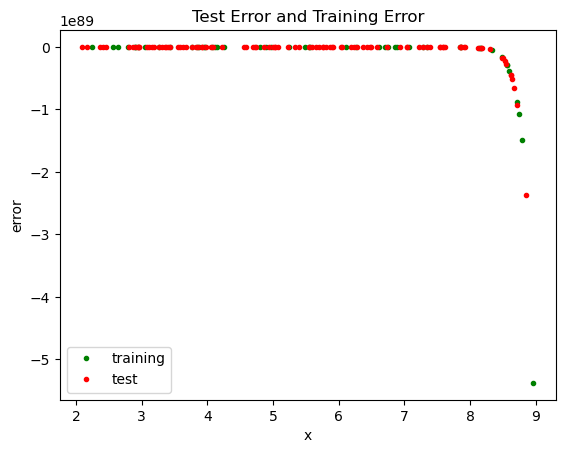

In [796]:
# Question 4
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial

poly_n = [];
# generate training data
x = np.random.uniform(2,9,100);
y = np.sin(x);
# lagrange interpolation without noise
poly = lagrange(x, y);


var = np.array([1,5,10,50]);
err = [];
train_err = [];
for i in range(0,3):
    noise = np.random.normal(0,var[i],100);
    # lagrange interpolation with noise
    poly_n.append(lagrange(x+noise, y));

    # generate testing data
    x_test = np.random.uniform(2,9,50)
    y_test = np.sin(x_test);
    y_pred = Polynomial(poly_n[i].coef[::-1])(x_test)
    err.append(y_test-y_pred)
    y_pred = Polynomial(poly_n[i].coef[::-1])(x+noise)
    train_err.append(y - y_pred)

err_test = Polynomial(poly.coef[::-1])(x_test) - y_test;
err_train = Polynomial(poly.coef[::-1])(x) - y;

plt.plot(x_test,err_test,'.',color='g', label='training')
plt.plot(x,err_train,'.', color='r', label='test')
plt.xlabel("x")
plt.ylabel("error")
plt.title("Test Error and Training Error")
plt.legend()



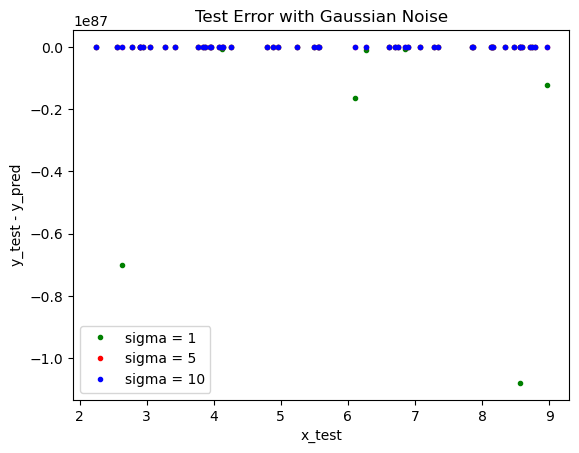

In [797]:
plt.plot(x_test,err[0],'.',color='g', label='sigma = 1')
plt.plot(x_test,err[1],'.', color='r', label='sigma = 5')
plt.plot(x_test,err[2],'.', color='b', label='sigma = 10')
plt.xlabel("x_test")
plt.ylabel("y_test - y_pred")
plt.title("Test Error with Gaussian Noise")
plt.legend()

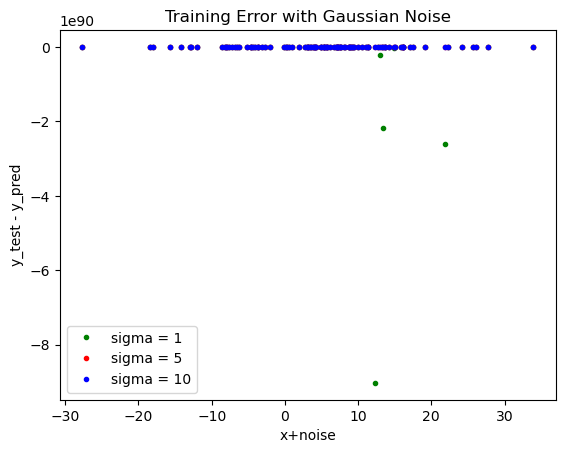

In [798]:
plt.plot(x+noise,train_err[0],'.',color='g', label='sigma = 1')
plt.plot(x+noise,train_err[1],'.', color='r', label='sigma = 5')
plt.plot(x+noise,train_err[2],'.', color='b', label='sigma = 10')
plt.xlabel("x+noise")
plt.ylabel("y_test - y_pred")
plt.title("Training Error with Gaussian Noise")
plt.legend()